__Cuaderno de trabajo de:__ Melvin Guaygua Huallpa

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math 

### Números pseudo-aleatorios

Cualquier lenguaje de programación tiene una función random, que cuando la llamamos nos devuelve un número pseudo-aleatorio entre 0 y 1. Todos los números entre 0 y 1 son *"igualmente probables"

In [2]:
random.random?

In [3]:
#Cada vez que ejecutamos este código obtenemos un número distinto:
random.random()

a = random.random() #Asi se generan numeros aleatorios
b = random.random()
c = random.random()
print(a)
print(b)
print(c)

0.17018758718556015
0.3539902696281786
0.8962002811704978


In [4]:
#Generamos 10 números pseudo-aleatorios y los imprimimos
for i in range(10):
    print(random.random())

0.5140004168313662
0.02053273246158871
0.5655643390932332
0.4602699592226418
0.7261120761223914
0.1019146215240706
0.4068782810999658
0.10985641290397441
0.1191914252255023
0.37821370553371203


Además, python nos ofrece otras funciones prácticas:

 - ``random.randint(a,b)`` devuelve un número entero entre a y b (inclusive). Todos los números entre a y b son *"igualmente probables"*.
 - ``random.choice(lista)`` devuelve un elemento de ``lista`` (que debe ser una lista, cadena de caracteres, conjunto...). Todos los elementos son *"igualmente probables"*.

In [5]:
for i in range(10):
    print (random.randint(10,20))

16
11
12
11
10
14
10
10
10
18


In [6]:
for i in range(10):
    print(random.choice('AEIOU')) #aqui le puedo pasar listas en vez de AEIOU

A
A
E
U
I
U
E
O
A
E


### Semilla aleatoria

Estos números parecen aleatorios, pero **el ordenador los obtiene aplicando reglas deterministas**. Sólo parecen aleatorios, pero *la cpu no lanza dados cuando llamamos a random*.

Esto no es un inconveniente en la práctica, porque son casi imposibles de distinguir de números auténticamente aleatorios.
De hecho, es una virtud, porque si fijamos la **semilla aleatoria**, podemos obtener exactmente los mismos números, aunque hagamos el cálculo en máquinas distintas varios años después.

In [7]:
#Si cambias la semilla, las elecciones cambian, pero con la misma semilla
#obtenemos los mismos resultados
random.seed(1)
for i in range(10):
    print (random.random())
# for i in range(10):
#     print (random.randint(10,20))
# for i in range(10):
#     print(random.choice('AEIOU'))
# for i in range(10):
#     print(random.choice(["hola","adiós","¿Qué tal?", "ahora vengo"]))

0.13436424411240122
0.8474337369372327
0.763774618976614
0.2550690257394217
0.49543508709194095
0.4494910647887381
0.651592972722763
0.7887233511355132
0.0938595867742349
0.02834747652200631


### Distribuciones de números aleatorios

El bloque de funciones de distribuciones ofrece numerosas funciones que permiten generar un array de números aleatorios a partir de distribuciones de todo tipo, vamos algunos ejemplos:

#### Distribución uniforme

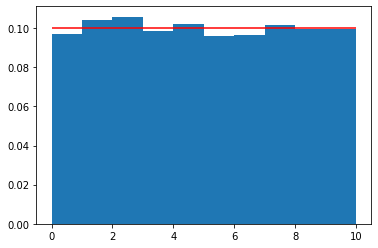

In [8]:
N_puntos = 10000
ini = 0
fin = 10
bins = 10

x = np.random.uniform(ini, fin, N_puntos)
plt.hist(x, bins,density=True)  #desity=True integra la curva a 1
plt.hlines(1/10, ini, fin, linestyles ="-", colors ="r")
plt.show() 

#### Distribución normal

Es una distribución gausiana
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

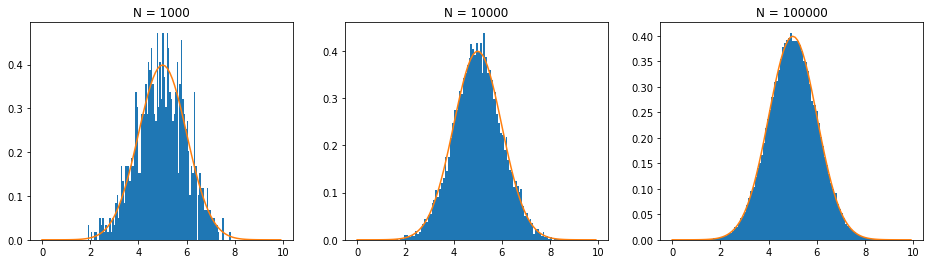

In [9]:
ini = 0
fin = 10
bins = 100
sigma = 1.0
mu = 5.0


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

N_puntos = 1000
x = np.random.normal(mu, sigma, N_puntos)
ax1.hist(x, bins,density=True)
ax1.set_title("N = "+str(N_puntos))

N_puntos = 10000
x = np.random.normal(mu, sigma, N_puntos)
ax2.hist(x, bins,density=True)
ax2.set_title("N = "+str(N_puntos))

N_puntos = 100000
x = np.random.normal(mu, sigma, N_puntos)
ax3.hist(x, bins,density=True)
ax3.set_title("N = "+str(N_puntos))

x = np.arange(0, 10, 0.1)
y=[]
for i in range(len(x)):
    y.append(1/math.sqrt(2*math.pi*sigma**2)*math.exp(-((x[i]-mu)**2)/(2*sigma**2)))
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)

plt.show() 

#### Distribución exponencial (esto lo ha puesto xq sale en la naturaleza, pero no lo usaremos cre)

Es una distribución exponencial
$$  f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})  $$

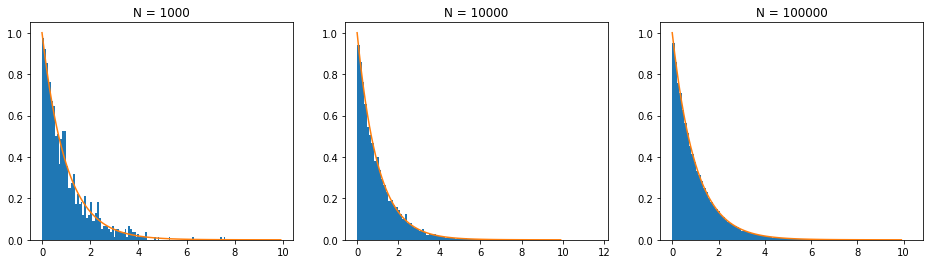

In [10]:
ini = 0
fin = 10
bins = 100
beta = 1.0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

N_puntos = 1000
x = np.random.exponential(beta, N_puntos)
ax1.hist(x, bins,density=True)
ax1.set_title("N = "+str(N_puntos))

N_puntos = 10000
x = np.random.exponential(beta, N_puntos)
ax2.hist(x, bins,density=True)
ax2.set_title("N = "+str(N_puntos))

N_puntos = 100000
x = np.random.exponential(beta, N_puntos)
ax3.hist(x, bins,density=True)
ax3.set_title("N = "+str(N_puntos))

x = np.arange(0, 10, 0.1)
y=[]
for i in range(len(x)):
    y.append(1/beta*math.exp(-x[i]/beta))
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)

plt.show() 

<hr>
<b><font color='red'>Ejercicio 01</font></b> 

Vamos a calcular el valor de $\pi$, para ello, si $X$ e $Y$ son dos variables aleatorias continuas uniformes en el intervalo (-1,1) y son independientes.  
$\pi$ Vendrá dada por la probabilidad de que $X^2 + Y^2  \leq 1$, es decir:  
$$\pi = \frac{4*\text{nº puntos que caén dentro}}{\text{nº total de intentos}}$$ 
Obten tambien una gráfica como la que se muestra a continuación.

In [11]:
N=10000 #número de intentos
#ayuda
plt.figure(figsize=(8,8))  #esto es para que salga cuadradito




<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [12]:
# #gráfico de burbujas o grafico de bolas
# def f(i,j):
#     return (j**2)*(i**2)

# x=[]
# y=[]
# z=[]
# N=10000
# step=2
# for i in np.arange(-N, N+step, step): #esto del 1 al 1000
#     for j in np.arange(-N, N+step, step):
#         a = random.random()
#         b = random.random()
#         x.append(a)
#         y.append(b)
#         z.append(f(a,b))
            
# plt.scatter(x, y, c=z, cmap='viridis',s=8) #s es el size del puntito
# plt.show()


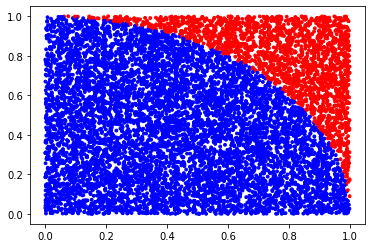

rojo 2146
azul 7854
dentro: 7854   fuera: 2146
numero pi 3.1416


In [13]:
#gráfico de burbujas o grafico de bolas
def f(i,j):
#     return (3.14*1)**2
#     return j*i
#     return (j**2)*(i**2)
    if (a**2+b**2) >=1:
        return "red"
    else:
        return "blue"

x=[]
y=[]
z=[]
N=10000
step=2

contadorRojo=0
contadorAzul=0
for i in range(0,N): #esto del 1 al 1000
    a = random.random()
    b = random.random()
    x.append(a)
    y.append(b)
    colorPintar = f(a,b)
    if colorPintar=="red":
        contadorRojo+=1
    else:
        contadorAzul+=1
    z.append(colorPintar)
            
plt.scatter(x, y, c=z, cmap='viridis',s=8) #s es el size del puntito
plt.show()

print("rojo",contadorRojo)
print("azul",contadorAzul)

# contadorRojo=contadorRojo*4
# contadorAzul=contadorAzul*4

#AZUL=DENTRO
#ROJO=FUERA

dentro=contadorAzul
fuera=contadorRojo
print("dentro:",dentro, "  fuera:",fuera)
numeroPi = 4*dentro/(dentro+fuera)
print("numero pi", numeroPi)


<img src="f6.png">  

<hr>
<b><font color='red'>Ejercicio 02</font></b> 

Crea un histograma en que se vea la distribución que saldría al sumar dos dados, tiene que verse una gráfica como la que se muestra a continuación

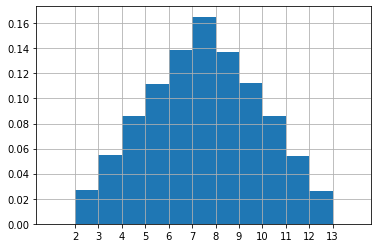

In [14]:
"""Esribe tu código aquí"""
#DICE ISRA QUE EL BINS QUE HAY QUE PONERLE ES UN ARRAY DEL 1 AL 14

N =20000
dados1=[]
for i in range(N):
#     print (random.randint(1,6)) #sacar numeros del 1 al 6
    dados1.append(random.randint(1,6))
# print(dados1)

dados2=[]
for i in range(N):
#     print (random.randint(1,6)) #sacar numeros del 1 al 6
    dados2.append(random.randint(1,6))
# print(dados2)

resul=[]
for i in range(N):
    resul.append(dados1[i]+dados2[i])
# print(resul)

lista=[]
for i in range(0,14):
#     print(i+1)
    lista.append(i+1)

plt.hist(resul, bins=lista, density=True) #bins es el numero de divisiones, si no lo pones nada lo divide en 10
plt.grid()

plt.xticks(np.arange(2,14,1))

plt.show()

<img src="f7.png">  

<hr>
<b><font color='red'>Ejercicio 03</font></b> 

Al implementar MD5, obtendremos como resultado, una cadena alfanumérica de 32 caracteres hexadecimales. Ocupando siempre 16 Bytes de memoria. 

El siguiente pin = '4aca32b706287f13903f08b7aab38f79', ha sido codificado con md5 "hashlib.md5(b'****')", para ello han utilizado dos carácteres en mayúsculas ('ABCDEF')  y dos números (0-9) , haz una función que obtenga el pin descodificado utilizando random.

¿Cuántos intentos ha relizado hasta que la ha descubierto?
Reliza el ejercicio varias veces y haz un histograma.



In [16]:
import hashlib

pin = "4aca32b706287f13903f08b7aab38f79"

h2 = hashlib.md5(b"melvin").hexdigest()
print(h2)

h3 = hashlib.md5(b"ruben")
print(h3.hexdigest())

# tengo que usar dos de (ABCDEF) y dos de (0-9)
resul=""
for i in range(2):
    a=random.choice('ABCDEF')
    b=random.choice('ABCDEF')
    print(a,b)
#     print(random.choice('AEIOU')) #aqui le puedo pasar listas en vez de AEIOU
    resul=a+b
for i in range(2):
    print (random.randint(0,9))
    
print(resul)


for i in range(4):
    noHashed=""
    a=random.choice('ABCDEF')
    b=random.choice('ABCDEF')
    c=random.randint(0,9)
    d=random.randint(0,9)
    noHashed=a+b+str(c)+str(d)
    print("no hasheado: ",noHashed)
    hashed = hashlib.md5(noHashed.encode('utf8')).hexdigest()
    print("hasheado: ",hashed)
#     if pin==noHash:
      
    
cont=0
encontrado=True
while encontrado:
    noHashed=""
    a=random.choice('ABCDEF')
    b=random.choice('ABCDEF')
    c=random.randint(0,9)
    d=random.randint(0,9)
    noHashed=a+b+str(c)+str(d)
    hashed = hashlib.md5(noHashed.encode('utf8')).hexdigest()
    if pin==hashed:
        encontrado=False
    cont+=1

dabd018f98476c1f6eb2f23e8d9b8920
32252792b9dccf239f5a5bd8e778dbc2
A E
C B
9
7
CB
no hasheado:  AE50
hasheado:  0a5534aed009bd6d4a961862d6268483
no hasheado:  AD06
hasheado:  2830d79cba4fd845bc4ae69f97e42ac3
no hasheado:  BF31
hasheado:  d86bf37e6fbc44caba3e9fa5a6339523
no hasheado:  DB58
hasheado:  45104f4dc647abb8d5b44a7827cd79ff


KeyboardInterrupt: 

In [17]:
import hashlib

pin = "4aca32b706287f13903f08b7aab38f79"

var ="melvin"
var = var.encode('utf8')

h2 = hashlib.md5(var).hexdigest()
print(h2)

h3 = hashlib.md5(b"melvin")
print(h3.hexdigest())


dabd018f98476c1f6eb2f23e8d9b8920
dabd018f98476c1f6eb2f23e8d9b8920


In [18]:
#ASI ESTA BIEN 
#4aca32b706287f13903f08b7aab38f79:1A2D
#PUEDO TABULAR UN BLOQUE DE CODIGO SELECCIONANDO TODO EL BLOQUE Y CLICK EN TABULADOR, PARA QUITAR TABULADO SHIT+TAB

pin = "4aca32b706287f13903f08b7aab38f79"
list=[]
N=10

for i in range(N):
    cont=0
    while True:
        noHashed=""
        a=random.choice('ABCDEF')
        b=random.choice('ABCDEF')
        c=random.randint(0,9)
        d=random.randint(0,9)
        noHashed=str(c)+a+str(d)+b
    #     noHashed=a+b+str(c)+str(d)
        hashed = hashlib.md5(noHashed.encode('utf8')).hexdigest()
        if pin==hashed:
#             print("OKOK")
#             print(noHashed)
            break
        cont+=1
    list.append(cont)
#     print(cont)
print(list)


    

[8959, 6513, 1313, 4566, 383, 1803, 4133, 264, 76, 680]


[1212, 5010, 2523, 181, 2528, 3000, 2400, 1798, 4925, 894, 13306, 811, 1505, 582, 10839, 6386, 556, 3661, 10934, 6259, 804, 536, 1129, 4932, 5058, 365, 319, 5233, 10692, 680, 807, 3348, 2612, 269, 827, 722, 1169, 664, 4065, 224, 840, 1525, 71, 1406, 10576, 660, 9841, 5812, 81, 967, 1576, 2887, 8201, 1189, 1277, 13047, 1760, 3628, 847, 3856, 6604, 2906, 5470, 7205, 260, 333, 3173, 528, 4857, 20, 4843, 506, 6158, 8, 5170, 4424, 3519, 672, 3767, 418, 3733, 391, 1009, 2133, 967, 980, 9295, 46, 1385, 1055, 156, 2808, 4757, 5652, 2250, 1924, 4057, 383, 596, 3385]


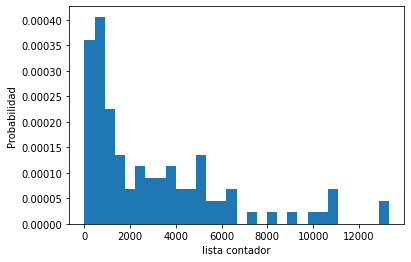

In [41]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# -----
pin = "4aca32b706287f13903f08b7aab38f79"
list=[]
N=100

for i in range(N):  
    cont=0
    while True:
        noHashed=""
        a=random.randint(0,9)
        b=random.choice('ABCDEF')    
        c=random.randint(0,9)
        d=random.choice('ABCDEF')
        noHashed=str(a)+b+str(c)+d
        hashed = hashlib.md5(noHashed.encode('utf8')).hexdigest()
        if pin==hashed:
            break
        cont+=1
    list.append(cont)
print(list)
# -----

x = np.array(list)

plt.hist(x,density=True, bins=30)
plt.ylabel('Probabilidad')
plt.xlabel('lista contador');
